In [1]:
import numpy as np
from numba import jit # makes code faster
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#%%timeit
@jit(nopython=True)
def estimatePi(N=100):
    pi = 2
    for i in range(1,N):
        pi *= 4*i*i/(4*i*i - 1)
    return pi

estimatePi(500)

3.1400206785767817

In [3]:
#%%timeit
@jit(nopython=True)
def fibonacci(NNN):
    n0 = 0
    n1 = 1
    n2 = 0
    print(n0, n1)
    
    for i in range(NNN):
        n2 = n0 + n1
        n0 = n1
        n1 = n2
        print(n2)
    print()

fibonacci(20)

0 1
1
2
3
5
8
13
21
34
55
89
144
233
377
610
987
1597
2584
4181
6765
10946



###### function quicksort(array)
    var list less, greater
    if length(array) < 2
        return array
    select and remove a pivot value pivot from array
    for each x in array
        if x < pivot + 1 then append x to less
        else append x to greater
    return concatenate(quicksort(less), pivot, quicksort(greater))

In [4]:
#%%timeit
#@jit(nopython=True) # commented is faster
def quicksort(array):
    less = []
    greater = []
    
    length = len(array)
    if length < 2:
        return array
    
    middle = length//2
    pivot = array[middle] # start in the middle -> faster
    array = list(array[:middle]) + list(array[middle+1:])
    print(array)

    for x in array:
        if x < (pivot+1):
            less.append(x)
        else:
            greater.append(x)
    
    return quicksort(less) + [pivot] + quicksort(greater)

arr = list(range(20))
quicksort(arr[::-1])

[19, 18, 17, 16, 15, 14, 13, 12, 11, 10, 8, 7, 6, 5, 4, 3, 2, 1, 0]
[8, 7, 6, 5, 3, 2, 1, 0]
[3, 2, 0]
[3]
[8, 7, 5]
[8]
[19, 18, 17, 16, 15, 13, 12, 11, 10]
[13, 12, 10]
[13]
[19, 18, 16, 15]
[16]
[19]


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

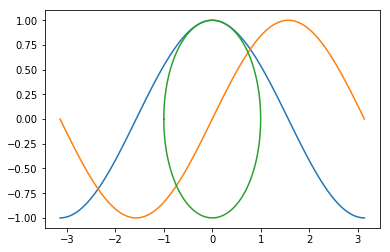

In [5]:
X = np.linspace(-np.pi, np.pi, 100)
C, S = np.cos(X), np.sin(X)
plt.plot(X, C)
plt.plot(X, S)
plt.plot(C, S)
plt.show()

In [6]:
a = np.linspace(0, 10, 11)
even = a[::2]
rodd = a[9::-2]
print(even, rodd, sep='\n')

[ 0.  2.  4.  6.  8. 10.]
[9. 7. 5. 3. 1.]


In [7]:
a = np.ones((4,4))
a[2,3] += 1
a[3,1] += 5
print(a)

[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 2.]
 [1. 6. 1. 1.]]


In [8]:
a = np.zeros((6,5))
a[1:] = np.diag(np.arange(2,7))
print(a)

[[0. 0. 0. 0. 0.]
 [2. 0. 0. 0. 0.]
 [0. 3. 0. 0. 0.]
 [0. 0. 4. 0. 0.]
 [0. 0. 0. 5. 0.]
 [0. 0. 0. 0. 6.]]


In [31]:
a = range(1000)
%timeit b = [a[i] + a[i+1] for i in a[::2]]
print(b)

a = np.arange(1000)
%timeit b = a[::2] + a[1::2] # only faster for big arrays
print(b)

136 µs ± 6.29 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
[ 1  5  9 13 17]
2.12 µs ± 127 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
[ 1  5  9 13 17]


In [28]:
%timeit [2**i for i in range(100)]
a = np.arange(100)
%timeit 2**a

33.6 µs ± 1.06 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
1.72 µs ± 25.1 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [30]:
%timeit [2**(3*i) - i for i in range(100)]
a = np.arange(100)
%timeit 2**(3*a) - a

48 µs ± 2.54 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
3.72 µs ± 356 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [11]:
a = np.arange(1,16).reshape(3,-1).T
b = a[[1,3]]
print(a, b, sep='\n\n')

[[ 1  6 11]
 [ 2  7 12]
 [ 3  8 13]
 [ 4  9 14]
 [ 5 10 15]]

[[ 2  7 12]
 [ 4  9 14]]


In [133]:
# closest elements to 0.5
a = np.random.rand(10,3)
b = np.abs(a - 0.5)
c = (np.argsort(np.argsort(b)) == 0)
print(a, a[c][:, np.newaxis], sep='\n\n')

[[0.23324744 0.59701751 0.09834316]
 [0.70918289 0.82752588 0.41576499]
 [0.06838278 0.59334318 0.80723714]
 [0.69887994 0.37940784 0.41693262]
 [0.07961755 0.07716307 0.76131069]
 [0.50402053 0.46687682 0.70469125]
 [0.37058124 0.62953517 0.4599498 ]
 [0.81498028 0.24550129 0.02883757]
 [0.81737892 0.50186386 0.14964121]
 [0.75925525 0.36660485 0.3296559 ]]

[[0.59701751]
 [0.41576499]
 [0.59334318]
 [0.41693262]
 [0.76131069]
 [0.50402053]
 [0.4599498 ]
 [0.24550129]
 [0.50186386]
 [0.36660485]]


In [132]:
X = 10**np.arange(6)
error = [(np.pi - estimatePi(i))/np.pi for i in X]
prediction = [1/i for i in X]

end = 3
plt.plot(X[:end], error[:end], label="Error")
plt.plot(X[:end], prediction[:end], label="1/N")
plt.legend()
plt.show()

plt.loglog(X, error, label="Error")
plt.loglog(X, prediction, label="1/N")
plt.legend()
plt.show()

NameError: name 'estimatePi' is not defined